<a href="https://colab.research.google.com/github/SMAntony/deep-learning-tools/blob/main/Lab4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10

In [3]:
train_ds, test_ds = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
split = int(train_ds[0].shape[0]*.8)
train_ds,val_ds = (train_ds[0][:split],train_ds[1][:split]),(train_ds[0][split:],train_ds[1][split:])
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.Resizing(32,32),                                      
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(factor=.2),
    tf.keras.layers.RandomContrast(factor=(.2,.8),),
    tf.keras.layers.RandomZoom(height_factor=(.1,.1))
])

def preprocess(x,y):
    return data_augumentation(x), tf.one_hot(tf.squeeze(y),10)

train_ds = tf.data.Dataset.from_tensor_slices(train_ds).map(preprocess).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices(val_ds).map(preprocess).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices(test_ds).map(preprocess).batch(64)

In [5]:
base_model = tf.keras.applications.VGG16(include_top=False,weights = "imagenet",input_shape=(32,32,3))

base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [6]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 14,887,818


In [7]:
model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 173,130
Non

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
history_1=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 78s 108ms/step - loss: 1.7231 - accuracy: 0.3787 - val_loss: 1.6238 - val_accuracy: 0.4198
Epoch 2/5
625/625 [==============================] - 67s 106ms/step - loss: 1.5729 - accuracy: 0.4388 - val_loss: 1.5859 - val_accuracy: 0.4344
Epoch 3/5
625/625 [==============================] - 66s 106ms/step - loss: 1.5324 - accuracy: 0.4557 - val_loss: 1.5382 - val_accuracy: 0.4590
Epoch 4/5
625/625 [==============================] - 66s 106ms/step - loss: 1.5009 - accuracy: 0.4662 - val_loss: 1.5185 - val_accuracy: 0.4630
Epoch 5/5
625/625 [==============================] - 66s 106ms/step - loss: 1.4834 - accuracy: 0.4689 - val_loss: 1.5049 - val_accuracy: 0.4709


In [10]:
model.layers[0].trainable=True
for layers in  base_model.layers[:15]:
  layers.trainable=False

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 7,252,554
N

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history_2=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 73s 115ms/step - loss: 1.7874 - accuracy: 0.3496 - val_loss: 1.5849 - val_accuracy: 0.4261
Epoch 2/5
625/625 [==============================] - 76s 122ms/step - loss: 1.4510 - accuracy: 0.4867 - val_loss: 1.4489 - val_accuracy: 0.4848
Epoch 3/5
625/625 [==============================] - 74s 118ms/step - loss: 1.3552 - accuracy: 0.5206 - val_loss: 1.3539 - val_accuracy: 0.5287
Epoch 4/5
625/625 [==============================] - 72s 116ms/step - loss: 1.3138 - accuracy: 0.5409 - val_loss: 1.3072 - val_accuracy: 0.5427
Epoch 5/5
625/625 [==============================] - 73s 117ms/step - loss: 1.2613 - accuracy: 0.5602 - val_loss: 1.2629 - val_accuracy: 0.5668


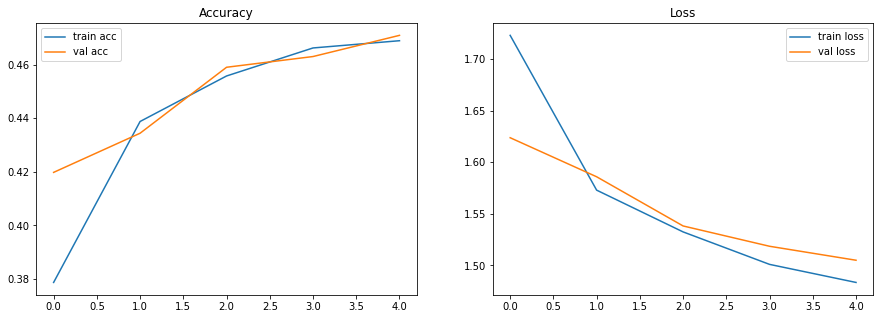

In [14]:
history_1=history_1.history
history_2=history_2.history

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history_1["accuracy"],label="train acc")
plt.plot(history_1["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history_1["loss"],label="train loss")
plt.plot(history_1["val_loss"],label="val loss")
plt.legend()

plt.show()